# 1. Parsing du document xml et extraction des informations en vue de la constitution d'un dataframe

In [5]:
def ParsingXMLTEItoDictList(CheminRelatifFichier):
    
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(open(CheminRelatifFichier, 'r'))

    ListeDicosPersonnes = []

    for persname in soup.find_all('persname'):

        DicoPersonne = {}

        for surname in persname.find_all('surname'):
            DicoPersonne['nom'] = surname.get_text()

        for forename in persname.find_all('forename'):
            DicoPersonne['prénom'] = forename.get_text()

        for genname in persname.find_all('genname'):
            DicoPersonne['surnom'] = genname.get_text()

        Roles = []
        for rolename in persname.find_all('rolename'):
            Roles.append(rolename.get_text())
            DicoPersonne['fonction'] = Roles

        for div1 in persname.find_parents('div1'):
            DicoPersonne['corps civique'] = div1['type']

        for div2 in persname.find_parents('div2'):
            DicoPersonne['Corporation'] = div2['type']

        for div3 in persname.find_parents('div3'):
            DicoPersonne['Poêle'] = div3['type']       

        ListeDicosPersonnes.append(DicoPersonne)

    return (ListeDicosPersonnes)

In [6]:
ListeDicosPersonnes = ParsingXMLTEItoDictList('../Sources/EditionsXML/aves_aa_195_f69r-77r-v2.xml')
print(ListeDicosPersonnes)

[{'nom': 'Schalck', 'prénom': 'Obreht', 'fonction': ['her', 'ammeister'], 'corps civique': 'Échevinat', 'Corporation': 'Corporation_à_l_Ancre', 'Poêle': 'Zum_Encker'}, {'nom': 'Armbruster In Brantgasse', 'prénom': 'Cünrat', 'corps civique': 'Échevinat', 'Corporation': 'Corporation_à_l_Ancre', 'Poêle': 'Zum_Encker'}, {'nom': 'Amlung', 'prénom': 'Hanns', 'corps civique': 'Échevinat', 'Corporation': 'Corporation_à_l_Ancre', 'Poêle': 'Zum_Encker'}, {'nom': 'Phige', 'prénom': 'Reimbolt', 'corps civique': 'Échevinat', 'Corporation': 'Corporation_à_l_Ancre', 'Poêle': 'Zum_Encker'}, {'nom': 'Lumbart', 'prénom': 'Hanns', 'corps civique': 'Échevinat', 'Corporation': 'Corporation_à_l_Ancre', 'Poêle': 'Zum_Encker'}, {'nom': 'Lumbart', 'prénom': 'Steffan', 'corps civique': 'Échevinat', 'Corporation': 'Corporation_à_l_Ancre', 'Poêle': 'Zum_Encker'}, {'nom': 'Armbruster', 'prénom': 'Hanns', 'fonction': ['rotherre'], 'corps civique': 'Échevinat', 'Corporation': 'Corporation_à_l_Ancre', 'Poêle': 'Zum_E

# 2. Normalisation des prénoms

Jacop
Jacop
Jacop
Jacop
Hanns
Hanns


In [7]:
ForenamesDict = {'Johann': ['Johann','Johanns','Hanns','Hans'],'Jakob':['Jacop'], 'Frantz': ['Frantz'],'Konrad':['Konrad','Cünrat'],'Küntzel':['Küntzel','Cüntzel'], 'Obrecht':['Obrecht','Obreht']}
for Dictionnary in ListeDicosPersonnes :
    for key1 in Dictionnary.keys():
        if key1 == 'prénom':
            value1 = Dictionnary[key1]
            print (key1, value1)
        for key2, value2 in ForenamesDict.items():
            for element in value2:
                if value1 == element:
                    Dictionnary[key1] = ListeDicosPersonnes[key2]
                #print (ListeDicosPersonnes)
                else :
                    
"""
            for value2, key2 in ForenamesDict.items():
                    #print(value2)
                for element in value2 :
                        if element == value1 :
                            #print (element)
                            value1 = key2
                        else:
                            Newvalue = input('Entrez la forme normalisée du prénom "' + value1 + '" :')
ForenamesDict[Newvalue] = []
ForenamesDict[Newvalue].append(value1)
print(ForenamesDict)
"""

IndentationError: expected an indented block (<ipython-input-7-0220e38d6a1a>, line 14)

ForenamesDict = {'Johann' : ['Johann', 'Johannes', 'Johanns','Hanns', 'Johan', 'Johanes', 'Johans', 'Hanns', 'Hannes', 'Hans', 'Hanes']}
for Dictionnary in ParsingXMLTEItoDictList('../Sources/EditionsXML/aves_aa_195_f69r-77r-v2.xml'):
    for key1 in Dictionnary.items():
        if key1 == 'prénom':
            print (Dictionnary[key1])
            for value2 in ForenamesDict.values():
                for element in value2:
                    if value1 == element :
                        value1 = key2
                    else:
                        Newkey = input('Entrez la forme normalisée du prénom "' + value1 + '" :')
                        Newvalue = []
                        #ForenamesDict[key2].append(print(input('Entrez la forme normalisée de ce prénom :')))
                        #ForenamesDict[Newkey] = Newvalue.append(value1)
                                
print(ForenamesDict)

In [62]:
import pandas as pd
dataframe = pd.DataFrame(ListeDicosPersonnes)
#print (dataframe)

In [63]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(dataframe)

                          nom      prénom                       fonction  \
0                     Schalck      Obreht               [her, ammeister]   
1    Armbruster In Brantgasse      Cünrat                            NaN   
2                      Amlung       Hanns                            NaN   
3                       Phige    Reimbolt                            NaN   
4                     Lumbart       Hanns                            NaN   
5                     Lumbart     Steffan                            NaN   
6                  Armbruster       Hanns                     [rotherre]   
7                    Bisinger    Heinrich                            NaN   
8                  Wissenburg       Hanns                            NaN   
9               von Lutesheim       Hanns                            NaN   
10                       Hage       Jacop                            NaN   
11                    Merckel     Cüntzel                            NaN   
12          

In [64]:
dataframe[["nom","prénom"]].describe()

,nom,prénom
count,348,374
unique,292,90
top,von Molsheim,Hanns
freq,5,104


In [65]:
NomPrénom = dataframe[['nom', 'prénom']].to_csv(index=False)
print (NomPrénom)
with open ('../Tables/NomsPrénoms.csv','w') as Doc:
    Doc.write(NomPrénom)

nom,prénom
Schalck,Obreht
Armbruster In Brantgasse,Cünrat
Amlung,Hanns
Phige,Reimbolt
Lumbart,Hanns
Lumbart,Steffan
Armbruster,Hanns
Bisinger,Heinrich
Wissenburg,Hanns
von Lutesheim,Hanns
Hage,Jacop
Merckel,Cüntzel
Berner,Frantz
Jude,Heintz
Amlung,Jacob
,
Rebe,Laulin
Schaffener,Hanns
Schultheiss,Panteleon
Erbe,Lawelin
Reb,Hensel
,Cüne
Cüne,Hensel
Lise,Heinrich
Wiss,Peter
Diether,Diebolt
Jeger,Hanseman
Hirse,Heintz
Riffe,Adam
Voltz,Peter
Barpfennig,Marx
Barpfennig,Rüdolff
Brucker,Peter
Riffe,Peter
Hapmacher,Andres
Böschwiller,Claus
Slempe,Heinrich
Scholle,Bernhart
von Seckingen,Fridel
Wormsser,Jacop
Stange,Erhart
Stange,Gilge
Würant,Claus
Menser,Hanns
von Cölne,Peter
von Northus,Hanns
Arge,Peter
Ofentürer,Peter
Dundenheim,Hanns
Dundenheim,Peter
Sahsse,Steffan
von Marle,Diebolt
Vilinger,Erhart
Meistersheim,Hanns
Rotschilt,Wilhelm
von Berse,Hanns
von Berse,Conrat
Betscholt,Wilhelm
von Hasela,Mathis
Wormsser,Voltz
Kalt,Hanns
Volmar,Jacob
Museler,Heinrich
Offenburg,Götze
Behtolt,Hanns
Lüger

In [19]:
import matplotlib.pyplot as plt
df2 = dataframe["Corporation"].value_counts()
df3 = dataframe['Poêle'].value_counts()

<AxesSubplot:ylabel='Corporation'>

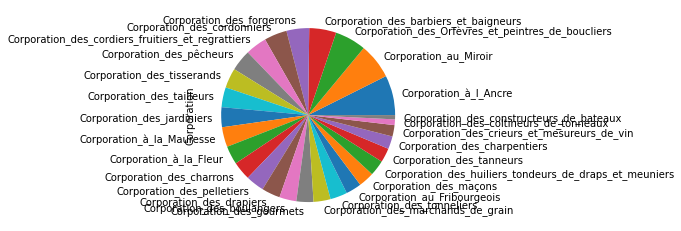

In [22]:
df2.plot.pie()

In [9]:
plt.show()